In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
hrt = pd.read_csv('heart.csv')
hrt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
hrt.shape

(918, 12)

In [51]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             914 non-null    float64
 1   Sex             915 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [52]:
hrt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,914.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.553611,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.424972,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [53]:
hrt.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [54]:
#Checking null values
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [55]:
#Filling null values in Age column with average age
hrt['Age'].fillna(np.mean(hrt['Age']), inplace = True)

C:\Users\kakan\AppData\Local\Temp\ipykernel_18424\1196188345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hrt['Age'].fillna(np.mean(hrt['Age']), inplace = True)


In [56]:
#Filling null values in Sex column with mode
hrt['Sex'].value_counts()

Sex
M    723
F    192
Name: count, dtype: int64

In [57]:
hrt['Sex'].fillna('M', inplace = True)

C:\Users\kakan\AppData\Local\Temp\ipykernel_18424\2391871088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hrt['Sex'].fillna('M', inplace = True)


In [58]:
hrt.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Exploratory Data Analysis

In [59]:
gender = hrt.Sex.value_counts()
gender.values


array([726, 192])

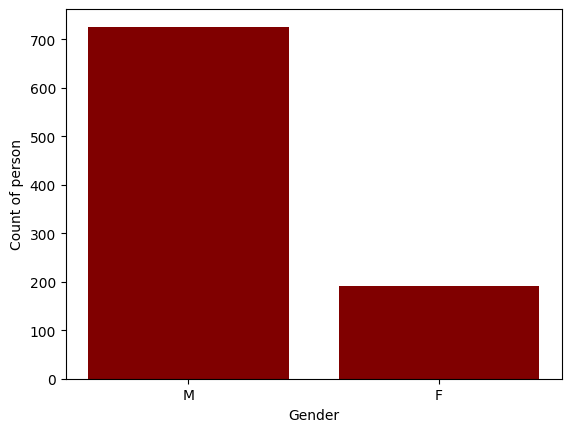

In [60]:
plt.bar(gender.index, gender.values, color = 'Maroon')
plt.xlabel("Gender")
plt.ylabel('Count of person')
plt.show()

<Axes: xlabel='Sex'>

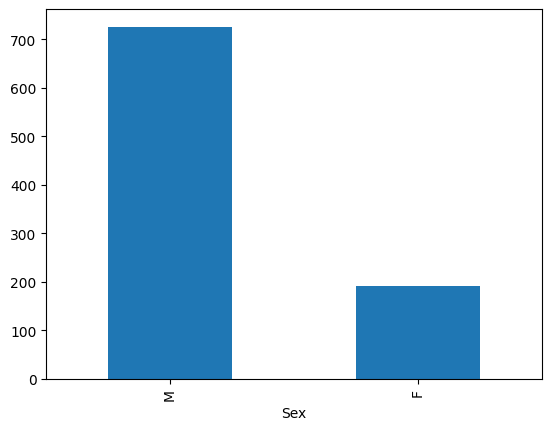

In [61]:
hrt['Sex'].value_counts().plot(kind='bar')

In [62]:
cp = hrt.ChestPainType.value_counts()
cp

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

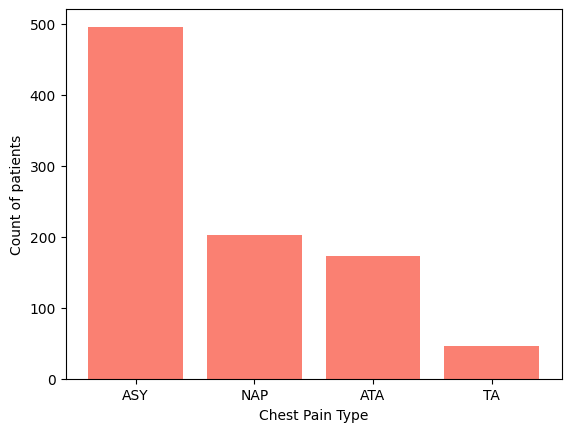

In [63]:
plt.bar(cp.index, cp.values, color='Salmon')
plt.xlabel("Chest Pain Type")
plt.ylabel('Count of patients')
plt.show()

<Axes: xlabel='ChestPainType'>

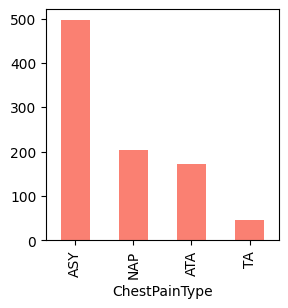

In [64]:
hrt['ChestPainType'].value_counts().plot(kind='bar',  color='Salmon', figsize=(3,3))

In [65]:
#Heart disease distribution
hd = hrt.HeartDisease.value_counts()
hd

HeartDisease
1    508
0    410
Name: count, dtype: int64

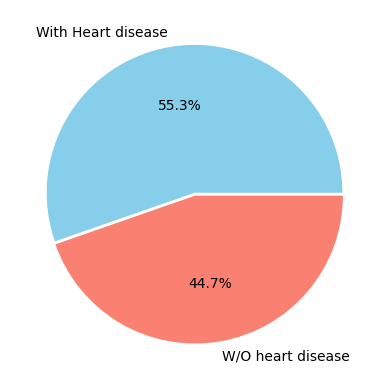

In [66]:
plt.pie(hd.values, labels=["With Heart disease", "W/O heart disease"], autopct = "%0.1f%%",
       explode=[0.01,0.01], colors=['SkyBlue','Salmon'])
plt.show()

<Axes: ylabel='count'>

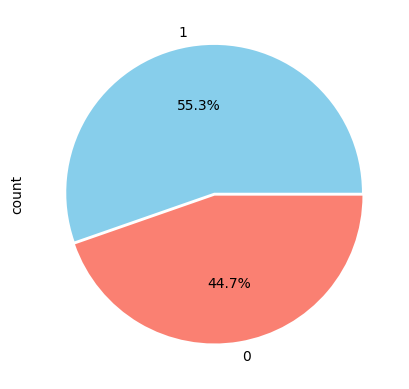

In [67]:
hrt.HeartDisease.value_counts().plot(kind='pie', autopct = "%0.1f%%",  explode=[0.01,0.01],colors=['SkyBlue','Salmon'])

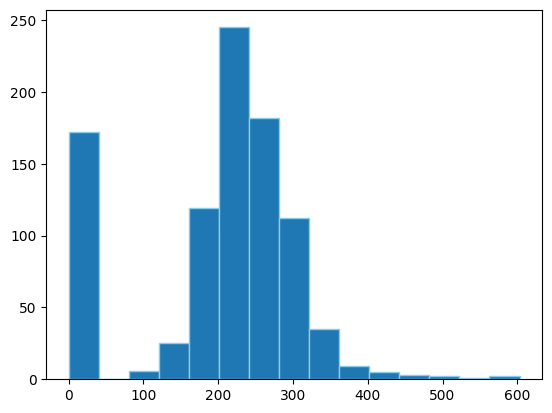

In [68]:
#Distribution of Cholesterol
plt.hist(hrt['Cholesterol'], bins=15, edgecolor = 'Skyblue')
plt.show()

<Axes: ylabel='Frequency'>

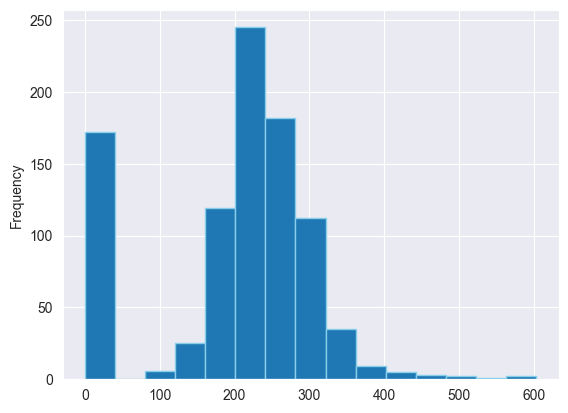

In [78]:
hrt['Cholesterol'].plot(kind='hist', bins=15, edgecolor = 'Skyblue')

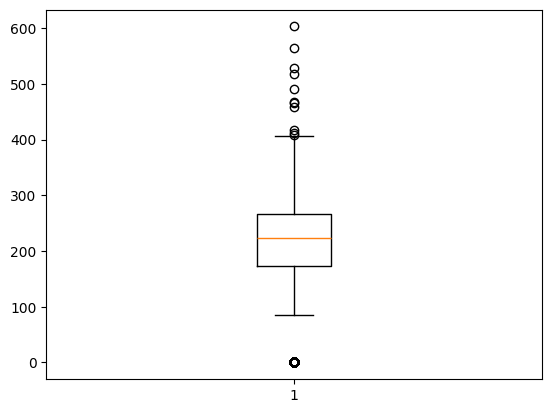

In [70]:
plt.boxplot(hrt['Cholesterol'])
plt.show()

<Axes: >

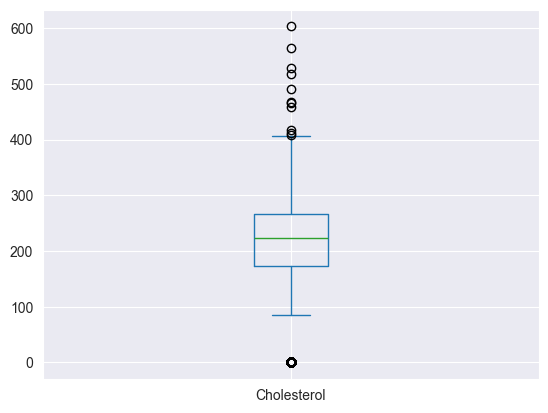

In [79]:
hrt['Cholesterol'].plot(kind='box')

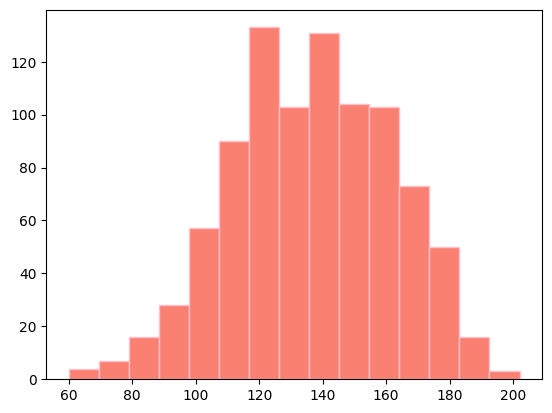

In [71]:
#Distribution of Heart rate
plt.hist(hrt.MaxHR, bins=15, color = 'Salmon', edgecolor = 'Pink')
plt.show()

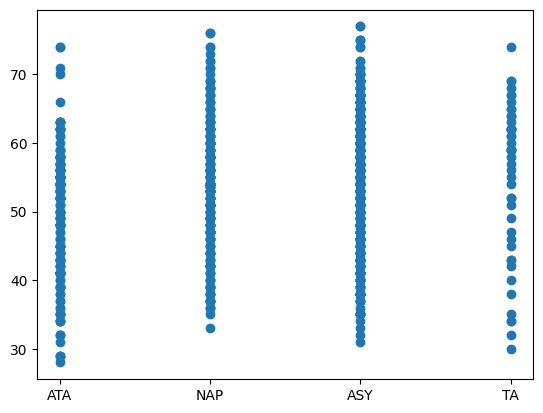

In [72]:
plt.scatter(hrt['ChestPainType'], hrt['Age'])
plt.show()

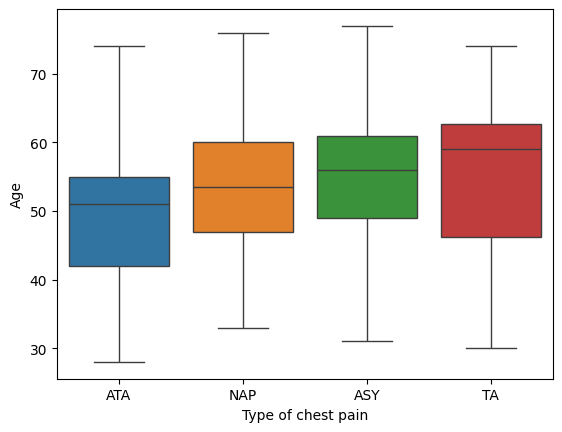

In [73]:
sns.boxplot(x = 'ChestPainType', y='Age', data=hrt, hue = 'ChestPainType')
plt.xlabel('Type of chest pain')
plt.ylabel('Age')
plt.show()

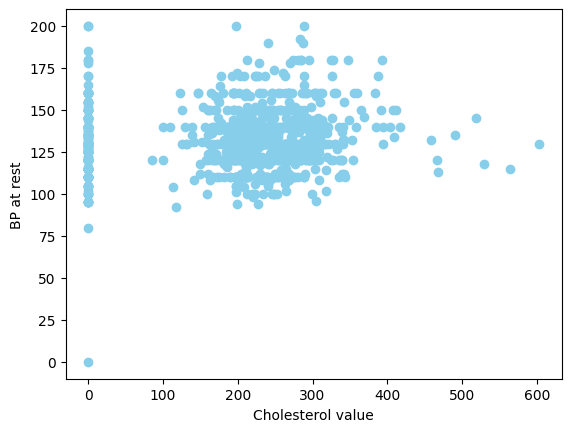

In [74]:
plt.scatter(hrt.Cholesterol, hrt.RestingBP, color = 'SkyBlue')
plt.xlabel('Cholesterol value')
plt.ylabel('BP at rest')
plt.show()

<Axes: xlabel='[Cholesterol]', ylabel='[RestingBP]'>

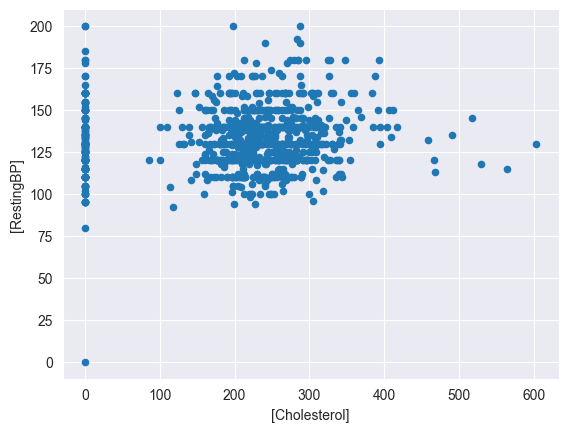

In [90]:
hrt.plot( kind='scatter',x= ['Cholesterol'], y=['RestingBP'] )

The graph shows that their is no conclusive evidence stating BP changes due to Cholesterol

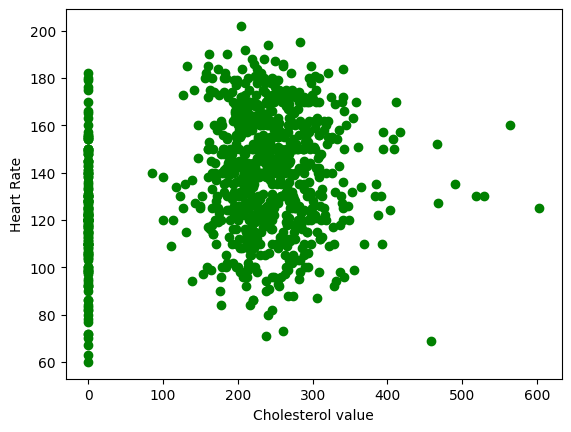

In [75]:
plt.scatter(hrt.Cholesterol, hrt.MaxHR, color = 'Green')
plt.xlabel('Cholesterol value')
plt.ylabel('Heart Rate')
plt.show()

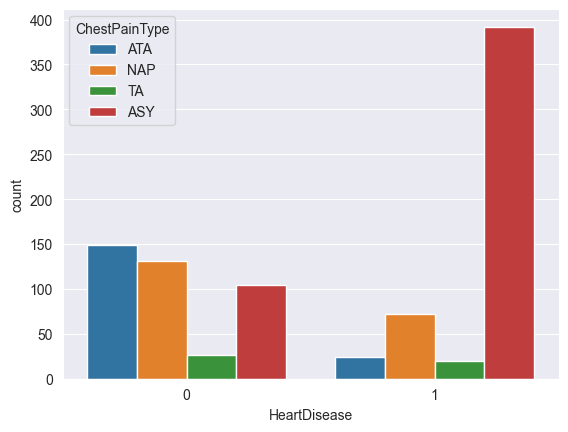

In [76]:
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ChestPainType', data = hrt)
plt.show()

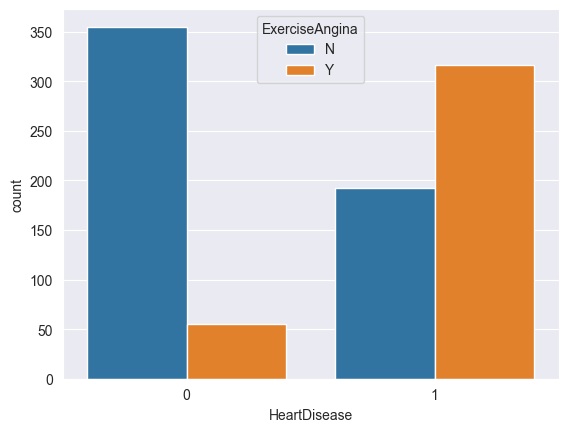

In [77]:
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ExerciseAngina', data = hrt)
plt.show()